<a href="https://colab.research.google.com/github/camila99urrego/ANAL-TICA-DESCRIPTIVA-1-/blob/main/Exploracion_de_datos_Analitica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-23-8937e67f12d2>:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Tipo de visa,Actividad de la visa,País de nacimiento,Sexo,Edad,Tiene Hijos,Nivel académico,Area conocimiento,Subarea conocimiento,Ciudad domicilio Colombia,Ciudad domicilio Colombia Código,Departamento domicilio Colombia,Actividad en Colombia,Ocupación en Colombia,Sector de actividad en Colombia,Tiene familiares residentes en Colombia,Año Expedición,Mes expedición,Numero
0,NEGOCIOS,NE-1,ARGENTINA,M,49.0,NO,(NO REGISTRA),(NO REGISTRA),(NO REGISTRA),CUCUTA,54001,NORTE DE SANTANDER,NO INDICA,NO REGISTRA,NO INDICA,NO,2014,1,1
1,NEGOCIOS,NE-1,ARGENTINA,M,52.0,NO,POSTGRADO - MAESTRIA,CIENCIAS DE LA SALUD,MEDICINA,BARRANQUILLA,8001,ATLANTICO,NO INDICA,NO REGISTRA,SERVICIOS,NO,2017,3,1
2,VISAS MIGRANTE,C�NYUGE DE NACIONALIDAD COLOMBIANO(A),VENEZUELA,M,69.0,NO,SIN PROFESI�N,NINGUNA,NINGUNA,ARMENIA,63001,QUINDIO,TRABAJO,NO REGISTRA,SERVICIOS,NO,2023,10,1
3,NEGOCIOS,NE-1,CHILE,M,62.0,NO,(NO REGISTRA),(NO REGISTRA),(NO REGISTRA),CUCUTA,54001,NORTE DE SANTANDER,NO INDICA,INGENIERO CIVIL,NO INDICA,NO,2014,2,1
4,VISAS MIGRANTE,TRABAJADOR,VENEZUELA,M,18.0,NO,SIN PROFESI�N,NINGUNA,NINGUNA,BOGOTA D.C.,11001,CUNDINAMARCA,NO INDICA,HOGAR,NO INDICA,NO,2023,10,1


Filas y columnas: (133970, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133970 entries, 0 to 133969
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Tipo de visa                             133970 non-null  object 
 1   Actividad de la visa                     133970 non-null  object 
 2   País de nacimiento                       133970 non-null  object 
 3   Sexo                                     133970 non-null  object 
 4   Edad                                     133967 non-null  float64
 5   Tiene Hijos                              133970 non-null  object 
 6   Nivel académico                          133970 non-null  object 
 7   Area conocimiento                        133970 non-null  object 
 8   Subarea conocimiento                     133970 non-null  object 
 9   Ciudad domicilio Colombia                133970 non-null  object 
 10  C

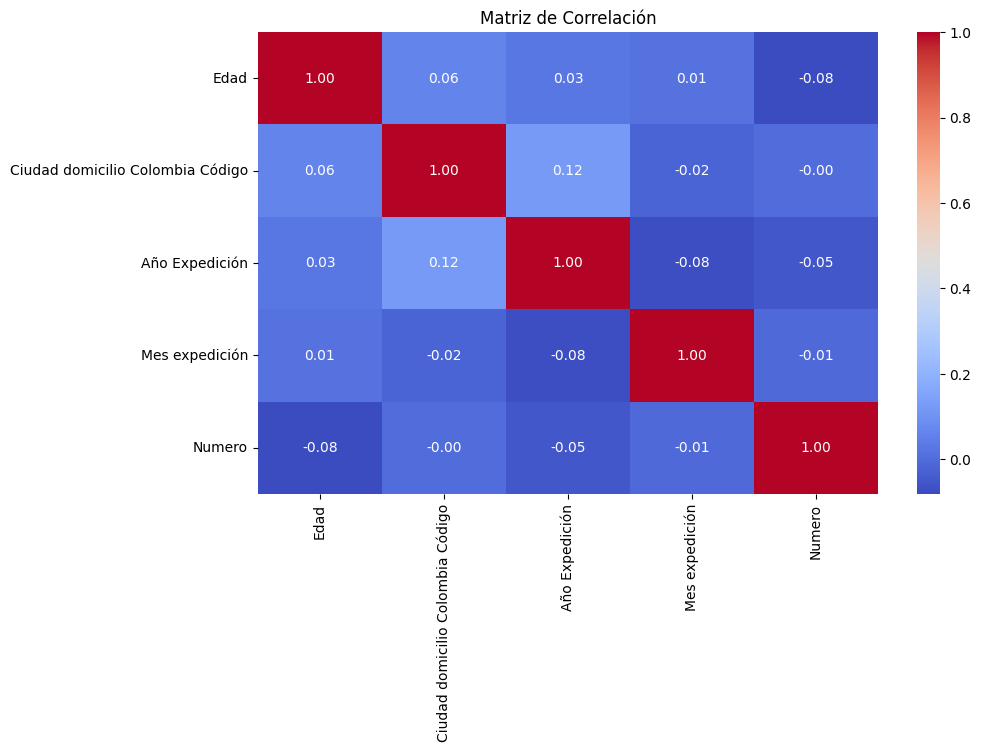

Edad - Media: 37.026319914605835, Mediana: 36.0, Moda: 33.0, Rango: 133.0, Desviación Estándar: 14.8558373010505


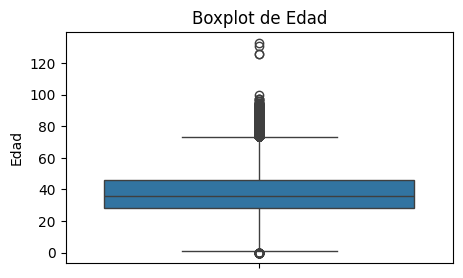

Sexo - Moda: M
Sexo
M        53.096962
F        46.899306
(NO R     0.002239
NB        0.001493
Name: proportion, dtype: float64
Tipo de visa - Moda: TEMPORAL
Tipo de visa
TEMPORAL           34.564455
VISAS MIGRANTE     28.787042
VISAS RESIDENTE    23.813540
TRASPASOS           7.215048
VISAS VISITANTE     4.882436
NEGOCIOS            0.737479
Name: proportion, dtype: float64
Nivel académico - Moda: PREGRADO - PROFESIONAL
Nivel académico
PREGRADO - PROFESIONAL            40.226170
SIN PROFESI�N                     28.860939
PREGRADO - T�CNICO PROFESIONAL     8.334702
(NO REGISTRA)                      7.137419
POSTGRADO - ESPECIALIZACI�N        5.299694
PREGRADO - TECNOL�GICO             4.419646
POSTGRADO - MAESTRIA               4.335299
POSTGRADO - DOCTORADO              1.342838
BACHILLERATO                       0.030604
PRIMARIA                           0.012689
Name: proportion, dtype: float64
Tabla de contingencia: Tipo de visa vs. Nivel académico
Nivel académico  (NO REGISTRA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "/content/Comportamiento_del_tr_mite_de_expedici_n_de_visa_colombiana_a_nacionales_de_Venezuela_20250224.csv"
df = pd.read_csv(file_path)

# Convertir variables numéricas a tipo adecuado
df[['Edad', 'Numero']] = df[['Edad', 'Numero']].apply(pd.to_numeric, errors='coerce')

# Visualización inicial
display(df.head())  # Primeras filas
print(f"Filas y columnas: {df.shape}")  # Dimensión del dataset
print(df.info())  # Información sobre tipos de datos y nulos
print(df.describe())  # Estadísticas descriptivas de variables numéricas

# Diagrama de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Estimadores centrales
variables_cuantitativas = ["Edad", "Número"]
for var in variables_cuantitativas:
    if var in df.columns and df[var].dtype in [np.float64, np.int64]:
        print(f"{var} - Media: {df[var].mean()}, Mediana: {df[var].median()}, Moda: {str(df[var].mode().values[0]) if not df[var].mode().empty else 'N/A'}, Rango: {str(df[var].max() - df[var].min())}, Desviación Estándar: {df[var].std()}")

# Diagramas de caja
for var in variables_cuantitativas:
    if var in df.columns and df[var].dtype in [np.float64, np.int64]:
        plt.figure(figsize=(5, 3))
        sns.boxplot(y=df[var])
        plt.title(f"Boxplot de {var}")
        plt.show()

# Frecuencias y moda de variables cualitativas
variables_cualitativas = ["Sexo", "Tipo de visa", "Nivel académico"]
for var in variables_cualitativas:
    if var in df.columns:
        print(f"{var} - Moda: {str(df[var].mode().values[0]) if not df[var].mode().empty else 'N/A'}")
        print(df[var].value_counts(normalize=True) * 100)  # Frecuencia relativa

# Tablas de contingencia
if "Tipo de visa" in df.columns and "Nivel académico" in df.columns:
    contingencia_1 = pd.crosstab(df["Tipo de visa"], df["Nivel académico"])
    print("Tabla de contingencia: Tipo de visa vs. Nivel académico")
    print(contingencia_1)

if "Sexo" in df.columns and "Tipo de visa" in df.columns:
    contingencia_2 = pd.crosstab(df["Sexo"], df["Tipo de visa"])
    print("\nTabla de contingencia: Sexo vs. Tipo de visa")
    print(contingencia_2)